# Logistic Regression

week3のLogistic Regressionの課題について

In [1]:
import math
import numpy as np
from scipy import optimize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import sys, os
sys.path.append(os.path.dirname('../common/'))
from common import *

## Visualizing the data

In [2]:
train_frame = pd.read_csv("ex2data1.txt", names=('exam1', 'exam2', 'result'))
train_frame.head(5)

,exam1,exam2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
# クラス毎にデータを分ける
pos = train_frame.ix[train_frame['result'] == 1]
neg = train_frame.ix[train_frame['result'] == 0]

saved assets/week03_lr_train.png


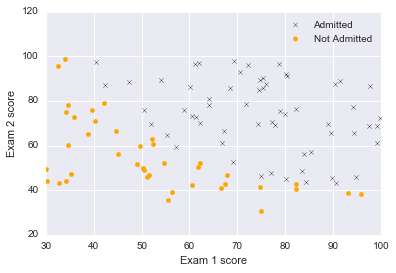

In [4]:
def plot_data():
    fig = plt.figure()
    plt.xlim(30, 100)
    plt.ylim(20, 120)

    ax = fig.add_subplot(1,1,1)
    ax.scatter(pos['exam1'], pos['exam2'],
               color='black', marker='x', label='Admitted')
    ax.scatter(neg['exam1'], neg['exam2'],
               color='orange', marker='o', label='Not Admitted')
    ax.legend()
    ax.set_xlabel('Exam 1 score')
    ax.set_ylabel('Exam 2 score')
    return ax

plot_data()
savefig('week03_lr_train.png')

## Evaluating logistic regression

In [5]:
%run "logreg.py"

### Sigmoid function

saved assets/week03_sigmoid.png


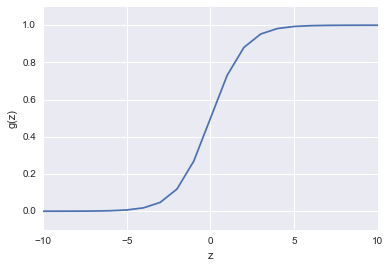

In [6]:
fig = plt.figure()
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
ax = fig.add_subplot(1, 1, 1)

z = np.arange(-10, 11, 1)
ax.plot(z, sigmoid(z))
ax.set_xlabel('z')
ax.set_ylabel('g(z)')
savefig('week03_sigmoid.png')

### Cost function and gradient

In [7]:
m = len(train_frame['exam1'])
X = np.c_[np.ones((m, 1)),
          np.array(train_frame['exam1']),
          np.array(train_frame['exam2'])]
y = np.array(train_frame['result']).reshape(-1, 1)

n = X.shape[1]
initial_theta = np.zeros((n, 1))

In [8]:
J, D = cost_function(initial_theta, X, y)
J, D

(0.69314718055994529, array([[ -0.1       ],
        [-12.00921659],
        [-11.26284221]]))

### Calculate parameters of hypothesis function

In [9]:
theta, J_history = optimize_params(initial_theta, X, y)

### Training curve

saved assets/week02_lr_cost_history.png


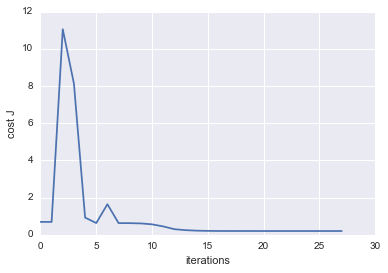

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(J_history)
ax.set_xlabel('iterations')
ax.set_ylabel('cost J')
savefig('week02_lr_cost_history.png')

### Plotting descision boundary

In [11]:
xmin, xmax = min(X[:,1]), max(X[:,1])
xs1 = np.linspace(xmin, xmax, 100)

# 決定境界は theta0 + theta1 * x1 + theta2 * x2 = 0 となるので
# x2 = -1/theta2 * (theta0 + theta1 *x1) を求める

xs2 = [-1/theta[2] * (theta[0] + theta[1] * x) for x in xs1]

saved assets/week03_lr_boundary.png


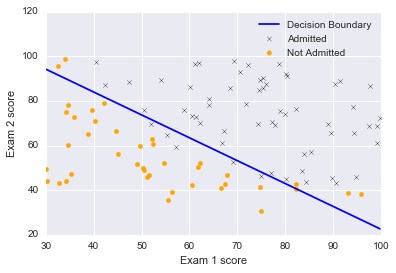

In [12]:
ax = plot_data()
ax.plot(xs1, xs2, color='blue', label='Decision Boundary')
ax.legend()
savefig('week03_lr_boundary.png')

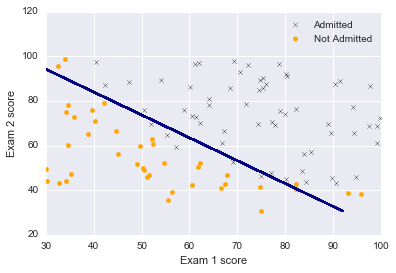

In [13]:
# 等高線を使って決定境界を描画

xs1, xs2 = np.meshgrid(X[:,1], X[:,2])
ys = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        x1 = np.array([xs1[i, j]])
        x2 = np.array([xs2[i, j]])
        ys[i, j] = np.dot(np.array([1, x1, x2]), theta)
        
ax = plot_data()
plt.jet()
ax.contour(xs1, xs2, ys, levels=[0])